# 4. Seleção de Variáveis

## Importando variáveis e dados

In [9]:
import pandas as pd
from sklearn import feature_selection
import matplotlib.pyplot as plt

In [4]:
df_modelo = pd.read_csv('df_modelo')

## Triagem de variáveis

Precisamos selecionar as variáveis com maior correlação com a determinação do resultado. A separação é feita para remover as irrelevantes. Remover esses recursos torna o resultado mais preciso também

<Axes: ylabel='feature'>

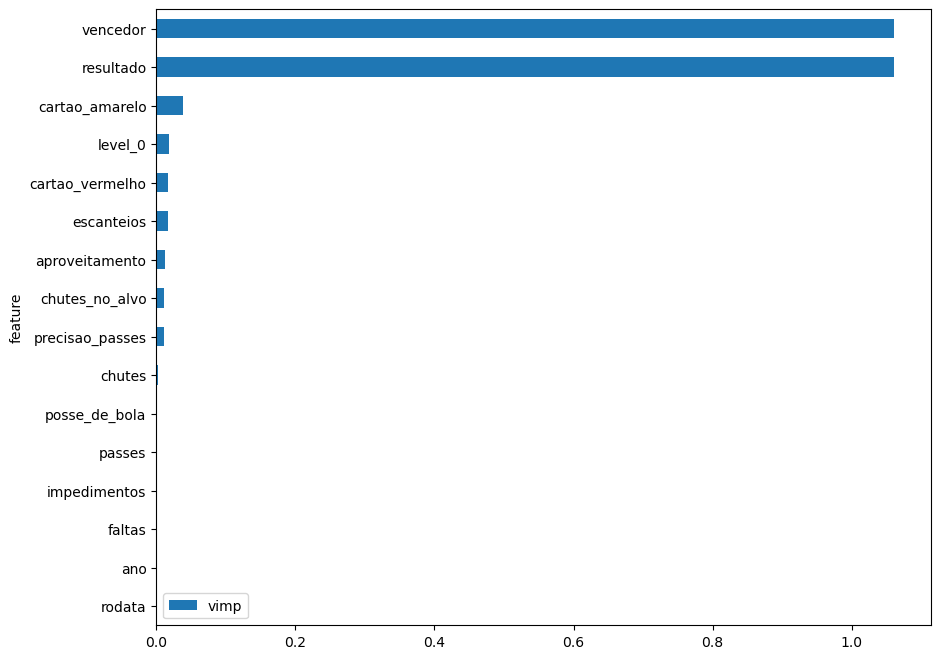

In [50]:
X = df_modelo
y = df_modelo.reset_index()['resultado']

mic = feature_selection.mutual_info_classif(X, y, random_state = 1333)

fig, ax = plt.subplots(figsize=(10, 8))

features = pd.DataFrame({
    'feature': X.columns,
    "vimp": mic
})

features.set_index('feature').sort_values(by = 'vimp').plot.barh(ax = ax)

O gráfico resultante mostra as variáveis por grau de importância na determinação da variável Y (vencedor da partida). Irei filtrar as variáveis com grau maior que 0

In [52]:
mask = features.set_index('feature').apply(lambda x: x>0).reset_index()

features = features[mask.vimp]

X = X[(features.set_index('feature').index)]

# 5. Aplicação dos Modelos

## KNN

### Padronizar dados

In [65]:
def padronizar(dados):
    resp = pd.DataFrame({})
    for c in dados.columns:
        if dados[c].dtype in ["float64", "int64"]:
            resp[c] = (dados[c] - dados[c].mean())/dados[c].std()
    return resp

modelo = padronizar(X)
modelo.head()

,resultado,aproveitamento,cartao_amarelo,cartao_vermelho,chutes,chutes_no_alvo,escanteios,level_0,precisao_passes,vencedor
0,-0.969367,0.343019,0.351225,-0.024257,-0.270337,1.338087,-0.831636,NaN,0.123652,0.960453
1,1.386733,0.343019,1.696196,-2.516702,1.713872,0.574811,0.712791,NaN,1.389595,-0.264168
2,-0.969367,0.343019,-2.158867,0.274836,0.882984,-0.002454,-0.585423,NaN,0.277194,0.960453
3,-0.969367,0.114155,-2.135408,-0.024257,-1.746093,-1.649774,-0.697338,NaN,0.371200,0.960453
4,-0.969367,0.114155,1.922965,-0.024257,-1.719223,0.992508,1.533500,NaN,-0.406959,0.960453
